# Машинное обучение, ВМК МГУ

# Практическое задание 4. Optimal Control Reinforcement Learning

## Общая информация
Дата выдачи: 30.04.2024

Мягкий дедлайн: 15.05.2024 5:30 MSK

Жёсткий дедлайн: 22.05.2024 5:30 MSK

## Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). **Максимальная оценка за работу  — 10 баллов.**

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи !!ВАЖНО!!!
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-04-ocrl-Username.ipynb


Username — ваша фамилия и имя на латинице именно в таком порядке

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.5 балла за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

## Задание 1 (4 балла): уравнения Рикатти для управления дроном.

Начнем с небольшой разминки: реализация классического алгоритма нахождения оптимального управления для двухмерного дрона. Его динамика уже реализована за вас в файле qudrotor.py. Кроме того, реализована также визуализация его управления.

В качестве описания текущего состояния предлагается использовать вектор из 6-ти элементов [x, dx, y, dy, theta, dtheta]:

*   x - координата центра дрона по x
*   dx - скорость центра дрона по x
*   y - координата центра дрона по y
*   dy - скорость центра дрона по y
*   theta - угол наклона относительно оси x
*   dtheta - угловая скорость

В качестве управления используем вектор из 2 элементов [u1, u2]:

*   u1 - сила тяги левого винта
*   u2 - сила тяги правого винта

Сила измеряется в ньютонах, прикладывается перпендикулярно линии, проведенной между двумя винтами.

In [54]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mp
import matplotlib.animation as animation
import IPython


MASS = 0.600 # mass of the quadrotor
INERTIA = 0.15 # inertia of the quadrotor

LENGTH = 0.2 # length of the quadrotor

GRAVITY=9.81 #gravity constant

DELTA_T = 0.01 #integration step

NUMBER_STATES = 6 # number of states
NUMBER_CONTROLS = 2 # number of controls


def get_next_state(z,u):
    """
    Inputs:
    z: state of the quadrotor as a numpy array (x, vx, y, vy, theta, omega)
    u: control as a numpy array (u1, u2)

    Output:
    the new state of the quadrotor as a numpy array
    """
    x = z[0]
    vx = z[1]
    y = z[2]
    vy = z[3]
    theta = z[4]
    omega = z[5]

    dydt = np.zeros([NUMBER_STATES,])
    dydt[0] = vx
    dydt[1] = (-(u[0] + u[1]) * np.sin(theta)) / MASS
    dydt[2] = vy
    dydt[3] = ((u[0] + u[1]) * np.cos(theta) - MASS * GRAVITY) / MASS
    dydt[4] = omega
    dydt[5] = (LENGTH * (u[0] - u[1])) / INERTIA

    z_next = z + dydt * DELTA_T

    return z_next



def simulate(z0, controller, horizon_length, disturbance = False):
    """
    This function simulates the quadrotor for horizon_length steps from initial state z0

    Inputs:
    z0: the initial conditions of the quadrotor as a numpy array (x, vx, y, vy, theta, omega)
    controller: a function that takes a state z as argument and index i of the time step and returns a control u
    horizon_length: the horizon length

    disturbance: if True will generate a random push every seconds during the simulation

    Output:
    t[time_horizon+1] contains the simulation time
    z[4, time_horizon+1] and u[2, time_horizon] containing the time evolution of states and control
    """

    t = np.zeros([horizon_length+1,])
    z=np.empty([NUMBER_STATES, horizon_length+1])
    z[:,0] = z0
    u=np.zeros([NUMBER_CONTROLS, horizon_length])
    for i in range(horizon_length):
        u[:,i] = controller(z[:,i],i)
        z[:,i+1] = get_next_state(z[:,i], u[:,i])
        if disturbance and np.mod(i,100)==0:
            dist = np.zeros([NUMBER_STATES, ])
            dist[1::2] = np.random.uniform(-1.,1,(3,))
            z[:,i+1] += dist
        t[i+1] = t[i] + DELTA_T
    return t, z, u


def animate_robot(x, u, dt = 0.01):
    """
    This function makes an animation showing the behavior of the quadrotor
    takes as input the result of a simulation (with dt=0.01s)
    """

    min_dt = 0.1
    if(dt < min_dt):
        steps = int(min_dt/dt)
        use_dt = int(np.round(min_dt * 1000))
    else:
        steps = 1
        use_dt = int(np.round(dt * 1000))

    #what we need to plot
    plotx = x[:,::steps]
    plotx = plotx[:,:-1]
    plotu = u[:,::steps]

    fig = mp.figure.Figure(figsize=[8.5,8.5])
    mp.backends.backend_agg.FigureCanvasAgg(fig)
    ax = fig.add_subplot(111, autoscale_on=False, xlim=[-4,6], ylim=[-4,4])
    ax.grid()

    list_of_lines = []

    #create the robot
    # the main frame
    line, = ax.plot([], [], 'k', lw=6)
    list_of_lines.append(line)
    # the left propeller
    line, = ax.plot([], [], 'b', lw=4)
    list_of_lines.append(line)
    # the right propeller
    line, = ax.plot([], [], 'b', lw=4)
    list_of_lines.append(line)
    # the left thrust
    line, = ax.plot([], [], 'r', lw=1)
    list_of_lines.append(line)
    # the right thrust
    line, = ax.plot([], [], 'r', lw=1)
    list_of_lines.append(line)

    def _animate(i):
        for l in list_of_lines: #reset all lines
            l.set_data([],[])

        theta = plotx[4,i]
        x = plotx[0,i]
        y = plotx[2,i]
        trans = np.array([[x,x],[y,y]])
        rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

        main_frame = np.array([[-LENGTH, LENGTH], [0,0]])
        main_frame = rot @ main_frame + trans

        left_propeller = np.array([[-1.3 * LENGTH, -0.7*LENGTH], [0.1,0.1]])
        left_propeller = rot @ left_propeller + trans

        right_propeller = np.array([[1.3 * LENGTH, 0.7*LENGTH], [0.1,0.1]])
        right_propeller = rot @ right_propeller + trans

        left_thrust = np.array([[LENGTH, LENGTH], [0.1, 0.1+plotu[0,i]*0.04]])
        left_thrust = rot @ left_thrust + trans

        right_thrust = np.array([[-LENGTH, -LENGTH], [0.1, 0.1+plotu[0,i]*0.04]])
        right_thrust = rot @ right_thrust + trans

        list_of_lines[0].set_data(main_frame[0,:], main_frame[1,:])
        list_of_lines[1].set_data(left_propeller[0,:], left_propeller[1,:])
        list_of_lines[2].set_data(right_propeller[0,:], right_propeller[1,:])
        list_of_lines[3].set_data(left_thrust[0,:], left_thrust[1,:])
        list_of_lines[4].set_data(right_thrust[0,:], right_thrust[1,:])

        return list_of_lines

    def _init():
        return _animate(0)


    ani = animation.FuncAnimation(fig, _animate, np.arange(0, len(plotx[0,:])),
        interval=use_dt, blit=True, init_func=_init)
    plt.close(fig)
    plt.close(ani._fig)
    IPython.display.display_html(IPython.core.display.HTML(ani.to_html5_video()))
import math
import sympy

Зададим параметы для дальнейшей работы:

In [55]:
m = 0.6 #масса дрона
r = 0.2 #длина дрона от левого до правого винта
I = 0.15 #инерция
g = 9.81 #ускорение свободного падения
dt = 0.01 #временной шаг

**Задание 1 (0.2 балла):** для начала проверим что все хорошо работает нормально. Реализуйте две функции-контроллера и проверьте их работу. Функции должны принимать на вход текущее состояние и номер таймстепа. Выдавать функции должны управление.

Первая функция должна давать команду ничего не делать (то есть всегда выдавать нулевое управление)

Вторая должна заставлять дрон висеть в воздухе при условии что он появляется в правильном положении параллельно оси x.

In [56]:
def do_nothing_controller(state=None, i=None):
    u = np.array([0.0, 0.0])
    return u

def stabilize_controller(state=None, i=None):
    u_total = m * g  # Полная сила тяги, необходимая для компенсации веса дрона
    u = np.array([u_total / 2, u_total / 2])  # Делим силу тяги поровну между двумя винтами
    return u

Проверим реализации. В первом случае дрон должен падать вниз, во втором - висеть в точке (0, 0).

In [57]:
N = 1000
x0 = np.zeros([NUMBER_STATES,])
t, x, u = simulate(x0, do_nothing_controller, N, disturbance = False)

animate_robot(x, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAJJ5tZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAN
hGWIhAA///73aJ8Cm1pDeoDklcUl20+B/6tncHyP6QMAAAMAAAMAAAMAAHWhYYApg1fRYcAAAAMA
CaABUACjAJSAqaEe7+J+6XEBBzCDnwaD0hD/80Pqm/O9WbRLWAt6J+Ksdk5m4xr4NYFIRHAMm4pG
WzXDCImvhyh/vPZxkCYjrb2H/XdEKVTFLDadaDvyF9NJsC79HfcAQsDGkXu3P7sL9ZzjaWUl3v+O
/n/l7Ii9tVp6WLKTbg6TYvsmQ2eTefCicFJP5NJRDLemqfxuh3BK0E4D2tm3aim3QpWiKx1Zv0Kr
jXd6X8HMAztMcKlkU+Wjm1UDZ8UT+5XeETC9k5UnXWBK6jGgzY+OKHJQ62IiKv5tMoAoCTWkc+kt
a/tuP438R5tyAAJNlOv0TXB4gMIBlAQ7E83wmUXgVm+ph/KkkUavkyM0Hv9ClRCcgCgg42JLVtBX
G0vwy4ZZvBGb1FnALctZL9/HHrjOOii5Af6cl+QrFX/A01fM6gXiBDDl2kDjFnOZ+wF/q/ktqD2d
v7QrrzEs34+ItKjQwW4/PCa8X6vXlAoWM9B2bbYVnPRNmHgd6QcBf+e2iv9G5/iswDAnBWi0Nuu3
+ioNmh7gd/tFfgi0lTJTBrmwU/zagDPrw56QaVLiIMxbjUa8zE69B8yU7Kc+hLmgrwcVdHq1tSSk
yqBZiOD6F49/feR3HQkK70JKQgg2SQob/betIFbxNz2Pe5pbwBK7VAAAlADbAcgHWJGTqQ8fHDA8
t7Ea1rhlvgc/a6eEJkYYMgxTwj1/h4Y2MNOypikgnW+d9l7gTGrjeRxZSFHSuIitxwjgOeIlwhxu
YIXuAvhpDd5TGtHa3Dh7nbDy3VoOWoClFysupZAhGyFADqMBauinPPOr/XoKw7x8Qi/5uDpGvl4f
0oVxXWNEid9uVauL6G+V85Xc+H/UOYblG6cpSdD1kFiOYjdF+JVz+/fYO6CRaQgh76xvhortzJYh
mbE0FNWRpPfZB8TEstGtoLVf/VOlPb4jQmFvKo3s5apXXhnlAtV0x5bDufRrDYIQBIvd2XQAABWM
juogAFy2a7IABK5/KEAMWOYKlQgciY4hbOc8/R3xJFHCIQ8vDuz0yEK1nXzf1IFszM3rUysZUCIJ
12DQymTA00YJN4HfkeIjFvsYV0esL/TtPYKADkxyOJQ0vjwerbKYk/diim7kvHQitSweNRReZlKl
ZMkKx+iZ5TNhaYYpQtZUqCLuZtMFx/sB0JUBEqFnAK8F8evFsRjd11KUTYObTFXzaYaRgzjc3wIE
eqm7JUcrYYETv3Pyos8CVMzmS76n9U62A4Jh5h8ZPegvFIHIDFKlA2HKdz9mpLW+pvCvmwKAJwcT
/ciyUawYxUn+1RaNIwBST3s60IJhQUqbAfPnOEnHkto+cZyrM+vlMgAuI0Wh0RKa7Yzx/1agZhhD
AqvTkAAAAwAAAwAf2BLVnNqwyOO1/yTT6w+f+JADgog7e65JBx89W+3f9H0vkhphnOBeNu0E6sxR
oZhE7aMK/0Fa2Rt91RfEInvDKZkazTsyh+itou6SWZNuhbN/mkdnoTBkz2wNqeTVvltAoNSStC5F
JvhsDIpbsVb899dXkw43pb3YVf9VlXQm57p54Deu0c81u6D/ko/etNbxhiKfQ/eWm8c32C4Gohj2
/FuKszQEBHCVn3g38QHYjtG+nw0vDSzqBNhCY9VyIVJAIWH+/5cIBgCDTeZ2NBLz3dQklHIaaw6W
Xyac2XfdmlHNY6NXsFoMxvHSn0LkJwks1z2CBd7LySr2jPPrLya7aJuvCPInXRuljXLv5jDXW3db
mpKq6DDIAPFgYeBUUz24W98ymwZv/vFigtFhKscSjd6/8JsSrA8iW7E/bccJ1lauvCn15t81bP7c
2+XKiASqMaz4XYbF/mG6O5MV6uzM/wAIjAFsdmqhBgt79FnZS3gpon4OjeuQKhyGqFTYMqud6/8r
/yNi+HPIA7K5+5kLVHevpVwNlL8T3Ih1ers1UgsO9LFsxnaEYMyPg9lrlw/4X860e5ZVlvUDyfxl
XjIRyLIAAC8sM0uc5DXbqvHaAAADAAADAcsAYPeaAZeE8dwhf09g2yPmWFoDOumg3b2FGS2pKPCc
kflya12ocbKFgKgXe2S3Ktwe0aIGb+3q4K+zcHSoCBbIveUuB2zKa9hMiG4sbLUtKqL8DuKBscWj
sOqPUcsAcZ/MFIrK998EAHmV92DgJmO6E7ebrnJI6Jqop/PPCMYUP3xJ6M/Rb/V7XIgWdaWRRJHL
XH2/CcVMPWjQjLGyUD2ZOCjI7VgrTZomlmgIIeghTMhFVi9hyhHfaB0LeuqL2Jb7GXeEkLs3duXs
8liKttsdXgjpAbQ9J0t8SMLmjHPDlqPN8OvEesFnB+CP5UGS093MGMQg0jyomXMt4GV2HguvOo2Q
DwzJDbrf0UY0vLbIkvKOQkf/zsUcVsL6jacKM4eiwlcftGuXNQ+Z33gcqJQR7tScQkszKUZzG7AC
9zO7fn9H6G1OUAAAAwAAAwBdMrutzfQ94OF+QBfQ3UKfXq1XYUggn+BvC3FOne1dL2AAA5R6qyni
j1vZBGdHNkduH6FK3+pzJLSPdCR6VWkYjLdvk0/dDwHuDF5RmOki+DSn664fYFgRGLaxxhVHi47S
/pl3MmSuFeV8CxY202bi6QdsgZpdLN9fBKHnTRcbR4WoEpZavym8fmhe0NcOGRUEHoaX/x8DHTzM
OONaDf/FNufd/H1w/eIDVi2PL//rKQfmhq6r0VUsS2T9aOVsKv//+trlFR+bpgJicoNHOwh1nyK8
L+/yDbuStpOm85c6kTWf5bIRttfF7p73h5DrM5IFDV9YMg/mAAADAAADAAAMMJqiJ6NhiiYwop7D
Ubj8frDgEh1R3xeWU5fqe

In [58]:
N = 1000
x0 = np.zeros([NUMBER_STATES,])
t, x, u = simulate(x0, stabilize_controller, N, disturbance = False)

animate_robot(x, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAHs9tZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAO
aGWIhAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMA
ALeAF7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94o
R2YuE9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7
mRH+hQlj3pK4394jsYHSaF9lPGtzD2Cqk2OFPlT08rHO4z/BHYhErQTAPayAuJqKzClaJFHXm/Qs
uNd3UyRPgHKhjhUsj30ZQm5rDo+Tluzfb2yBEPqOQWJ2QpjQZsfHFDmodbGfQDLSNoAoCTWkc+kt
a/tuVoYAI825AAEm0/Zkrfw7uTf3n+xAOoBuAVLHujGrUXh1odl+tLKtVz9RYQNPxcnxelv0MSyl
IhBX3Ogxfnby6p9vEt8VFnALctZL9/HHrjnOii5Af6cl+QqwX/A01fM6gXiBDDl86DjFnOZ+wF/q
/kRhT2dv7QrrzEw5xtl4DbHhz0UUW9OOJRlNxvRD6MJxjxWhZYa/xueQ3o+ek/ZYt0pp5TCRCjyr
b7DTzzDlsxklbL/+h6zzPomDYM5oZFPpU1N9eds0nSvHMW41GvMxOvWPoR3asp7ijNBpZzJ0erW1
JKTKr0ECm3/L+OqH0yzgrD/xUklIQVZt4P81uA2/Ct4m57HyyBKppeoAAAMAAAMAAAMAALUhZOpD
x8JJZhtEZ1U2GxF56rYx3NADHplRg+KHv8PDGxhqCVMUkE630DsvcCY1cbyOLKQoPzKIrccI4Dni
JcIcbqhNtDODTP/Ridz81zhy9zthzCykHLUBSi5WXUwNrvyhADqMBauinPN4L/qDAN6F7BznXAeh
8+juOM+W6aAybK6xokTvtyrVt/Q3yvrK7kQ/6pLZvtEKWq2T2YjeKufLRDdg3P8F9g7nNL6SNtvr
G9Ez7FKaPY5kIlCtoRTe+yEMl4dCNcIUa/+qdKe3xGhMLeVQmRyz8NyHPKBarpjzEHatUFkcwoz7
xlAbDhfsTt83MAAAAwAAAwAAAwAu+lgqUzMsISBC2c55+jviSKOEQd5eHdnpkIVrOvm6qQLZmZvW
plc40GIJ12DQ6aTA00YJN5nfkkauBiSwH4lFtd7oiwJxT+SRGydBbA8Uvi1+5jTpn4Yz56qOhFal
g8aii7zKVKyZIXD9BFYUjC0wxShaypUEXclaYLj/YDzlnaRN4wv7IVcTiU0AsSPP+2RHXERg0w1I
A+dwD2mhzMf3/Pc0kBi5j/q3+EgC6G+qRuYW1FSPKGkplXMpiz2fHoHIDFMm369+1Y3PJ+t9TeFf
WwcATg4Wb9kKU6vnlwsW1RaNIwBST3s60IJhW0qbAfPnOEnHowv+2cQVczyeWbIA5QNAW99m0L3h
3bX4IyA0Y6j0gCYQdfHMAAQrZ2hwAGJc6TZbXOr0VCDlMdGmo7szXVCFcssrAen2V6agLKsIdKK0
FIm9G6q1ZEB64eG9Hn/w+dCtEAM9odixE4jOr+FN1COCe/cSLU1+1AMSzDwiOxDlKwywos45JlOx
jNnP4G1vp5JBc5/LAHaSYEhhuMkl20z5iXZmQNatl856csZiYSDRkpVwkRwXnl/vsL23Yc2EzF1+
TpnXTxPxpe99ZE11Pu3kv68gWRFSSUqebGNJbUBIC6qPP/wvVoq/jfs5WvsGluw1f7y1TgAOl8xX
PUV9AWNzfmwi4Deu0Sgqs4n/oE8/QtDJFCHbo92s/vGk3fEyrjfeJ3PnBKpH9CIGd+fkUlHXL4fy
1gjwxPZmIt4zmHZMgJSjwx1STSmdZLnZawZGthdvJB5wtraP6DhiKVjB1GkBGm4mqVC8BzxHn07g
rEFYesrD0eyBLyj8vVShXI7/Qth+1CHNAjV4zvBnhuLTOjfAfFMtYlIskIZMyCs/8NOA0gCW38Ll
tbfrQZdor8z2CjYp1n+LUW+Lj9865t2liGHZRWyFqn5Oi/laeX03WNMvoJjeq9wUrOga3lvDjyU4
GTAKSd7z/VHzt0USZbtbXtEE93Vh1sLXu6hyvZ7kzkDPKdNNOvL98xtqIJC96qgq9T41ReX6+rgq
+WsWughNTOrHwe8kFu/uGTm7RWOjacGs8T8bEXpoXurfMsVMUk6aFO/IgwRx+dBcoOILm0oOcBmR
SZJ+HZ+pqo2q5qm5pUukFOe4ObCE8J5UpHnTM5BOPBwes+l/tvXWmePCrpwTVqkcjz5Q1SGe+/8b
uBT/dYBnk8u28pQHevkc0iFrQM5dBTZtmUGpW5uuRrm+mkQVo3VF19vZHCBLEG558rMHTw4eHvJS
4492YqWMBjGet9k5GXjbnAAA9YAAAAMAHryFJV6+iTqQGRjoeZ4rYDMnCiPl7Pi4pU5cdol6ROF5
mz9RcOb3HHpyuAKh033Ktwe0aIGb+3gy530YHSpniuZ8PMUDtmU17CZENyjqlCpgW6AhFR9eUX32
JKjsZhCL5mClO6c3YIAPMr7sHAjnWfnb2VJJfmWKHBfzzwkQqJKetDtfxb/V7XIlYbzEr9RHsNim
L4pz9ewev4/+x3N7ZOCjI3w86fvNoptN569BCmdBb5XOnMBJZNYtAGOQ0XSpMywJXOPpd5PTopOw
x2iZiA1qmu01BxlKfQF4iBoNc4qP+f4Ji44lNFZcwHqswjsOqNZ3b3I5abF0buHb1/gQ8UkxsoKA
N06Z23vkUWH/dHL7cVBzzwxl4BAJhQwFweML2Ir8C+gl3fKQobzQ/CoUHqVW3wHGqd5u0h91XpQA
AAMAAAMAAAV3XZIHubxbRQM6QjidZRan07+oxCBZYa54YtQMk0IoM4AAC/dncTnChTNU+3s+6m7c
P0KVxi1noOM0Y3hqPutp1

**Задание 2 (1.5 баллов):**Как вы помните, уравнения Рикатти как и базовый алгоритм ПМП удобнее всего реализовывать для задачи типа LQR. Однако, она имеет 2 требования, которые не выполняются в нашей задаче.

Требование 1: динамика должна выглядеть следующим образом:
$x_{k+1} = Ax_k + Bu_k$.

Требование 2: функция потерь должна выглядеть следующим образом:
$cost(x,u) = x^TQx + uRu$


Для нашей задачи выписать подобные матрицы в общем случае невозможно. Попробуем нашу динамику аппроксимировать линейной в каждой точке.

Требование 2 не выполняется, так как нам в теории хочется чтобы дрон оказался в конкретной точке. То есть, хочется минимизировать такой лосс: $cost(x,u) = (x-x^*)^TQ(x-x^*) + (u-u^*)^TR(u-u^*)$. Самый простой выход в нашем случае - решать задачу в терминах расстояний до конечной точки (то есть, новый вектор наблюдений - $\overline{x} = (x-x^*), \overline{u}=(u-u^*)$

1. Выпишите аппроксимацию функции (пока без А и В, просто через приращения) $f(x,u)$, где $x_{n+1} = f(x_n, u_n)$. Keywords: второй закон Ньютона, линейное и угловое ускорение стержня, здравый смысл

2. С помощью разложения в ряд Тейлора в окрестности $x^*, u^*$ выведите функцию $\overline{f}: \overline{x}_{n+1} = \overline{f}(\overline{x}_{n}, \overline{u}_{n}) = A\overline{x}_{n} + B\overline{u}_{n}$

3. Запрограммируйте подсчет этих матриц


**1. Аппроксимация функции $f(x, u)$**

Динамика квадрокоптера описывается следующими уравнениями:


\begin{align*}
x_{n+1} &= x_n + \dot{x}_n \Delta t, \\
\dot{x}_{n+1} &= \dot{x}_n + a_x \Delta t, \\
y_{n+1} &= y_n + \dot{y}_n \Delta t, \\
\dot{y}_{n+1} &= \dot{y}_n + a_y \Delta t, \\
\theta_{n+1} &= \theta_n + \dot{\theta}_n \Delta t, \\
\dot{\theta}_{n+1} &= \dot{\theta}_n + \alpha \Delta t,
\end{align*}


где $a_{x}$ и $a_y$ — линейные ускорения, $\alpha$ — угловое ускорение. Линейные ускорения можно выразить как:


\begin{align*}
a_x &= -\frac{u_1 + u_2}{m} \sin(\theta), \\
a_y &= \frac{u_1 + u_2}{m} \cos(\theta) - g.
\end{align*}


Угловое ускорение:


$\alpha = \frac{2r (u_2 - u_1)}{I}$

С учетом вышеописанной динамики, функцию \( f \) можно записать следующим образом:

$
f(z, u) = \begin{bmatrix}
x + \dot{x} \Delta t \\
\dot{x} - \frac{(u_1 + u_2)}{m} \sin(\theta) \Delta t \\
y + \dot{y} \Delta t \\
\dot{y} + \left(\frac{(u_1 + u_2)}{m} \cos(\theta) - g\right) \Delta t \\
\theta + \dot{\theta} \Delta t \\
\dot{\theta} + \frac{0.5 * r (u_2 - u_1)}{I} \Delta t
\end{bmatrix}
$.


**2. Разложение в ряд Тейлора**

Разложим функцию $f(x, u)$ в ряд Тейлора в окрестности $x^*$ и $u^*$:

$
f(x, u) \approx f(x^*, u^*) + \frac{\partial f}{\partial x} \bigg|_{(x^*, u^*)} (x - x^*) + \frac{\partial f}{\partial u} \bigg|_{(x^*, u^*)} (u - u^*).
$

Обозначим:

$
\overline{x} = x - x^*, \quad \overline{u} = u - u^*.
$

Тогда:

$
\overline{f}(\overline{x}, \overline{u}) = A \overline{x} + B \overline{u},
$

где

$
A = \frac{\partial f}{\partial x} \bigg|_{(x^*, u^*)}, \quad B = \frac{\partial f}{\partial u} \bigg|_{(x^*, u^*)}.
$

**3. Заполнение матриц $A$ и $B$**

Матрица $A$ получается из частных производных функции $f$ по состояниям $x$:

$
A = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_6} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_6} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_6}{\partial x_1} & \frac{\partial f_6}{\partial x_2} & \cdots & \frac{\partial f_6}{\partial x_6} \\
\end{bmatrix}
$

Матрица $B$ получается из частных производных функции $f$ по управлениям $u$:

$
B = \begin{bmatrix}
\frac{\partial f_1}{\partial u_1} & \frac{\partial f_1}{\partial u_2} \\
\frac{\partial f_2}{\partial u_1} & \frac{\partial f_2}{\partial u_2} \\
\vdots & \vdots \\
\frac{\partial f_6}{\partial u_1} & \frac{\partial f_6}{\partial u_2} \\
\end{bmatrix}
$

**Вычисление частных производных**

Для вычисления матриц $A$ и $B$ нам нужно взять частные производные функции $f$ по состояниям $x$ и управлениям $u$.


Чтобы вычислить частные производные по состояниям $x$, используем следующие выражения для функции $f$:

$
f(x, u) = \begin{bmatrix}
x + \dot{x} \Delta t \\
\dot{x} - \frac{(u_1 + u_2)}{m} \sin(\theta) \Delta t \\
y + \dot{y} \Delta t \\
\dot{y} + \left(\frac{(u_1 + u_2)}{m} \cos(\theta) - g\right) \Delta t \\
\theta + \dot{\theta} \Delta t \\
\dot{\theta} + \frac{0.5 * r (u_2 - u_1)}{I} \Delta t
\end{bmatrix}
$

Теперь вычислим частные производные функции $f$ по состояниям $ x_1, x_2, \ldots, x_6 $. Например, для $ \frac{\partial f_1}{\partial x_1} $ имеем:

$
\frac{\partial f_1}{\partial x_1} = 1, \quad \frac{\partial f_1}{\partial x_2} = \Delta t, \quad \ldots
$

Аналогично вычисляем остальные частные производные.


Чтобы вычислить частные производные по управлениям $ u $, также используем функцию $ f $. Например, для $ \frac{\partial f_1}{\partial u_1} $ и $ \frac{\partial f_1}{\partial u_2} $ имеем:

$
\frac{\partial f_1}{\partial u_1} = 0, \quad \frac{\partial f_1}{\partial u_2} = 0, \quad \ldots
$

Аналогично вычисляем остальные частные производные.


Для системы с дискретными временными шагами $\Delta t$, матрицы $A$ и $B$ будут выглядеть следующим образом:

$
A = \begin{bmatrix}
1 & \Delta t & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & -\frac{(u_1 + u_2) \cos(\theta)}{m} \Delta t & 0 \\
0 & 0 & 1 & \Delta t & 0 & 0 \\
0 & 0 & 0 & 1 & -\frac{(u_1 + u_2) \sin(\theta)}{m} \Delta t & 0 \\
0 & 0 & 0 & 0 & 1 & \Delta t \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$

$
B = \begin{bmatrix}
0 & 0 \\
-\frac{\sin(\theta)}{m} \Delta t & -\frac{\sin(\theta)}{m} \Delta t \\
0 & 0 \\
\frac{\cos(\theta)}{m} \Delta t & \frac{\cos(\theta)}{m} \Delta t \\
0 & 0 \\
\frac{-0.5 * r}{I} \Delta t & \frac{0.5 * r}{I} \Delta t \\
\end{bmatrix}
$



In [59]:
def get_linearization(z, u):
    m = 0.6 #масса
    r = 0.2 #длина
    I = 0.15 #инерция
    g = 9.81 #ускорение свободного падения
    dt = 0.01 #временной промежуток

    x, vx, y, vy, theta, omega = z
    u1, u2 = u

    # Вычислим производные f по x и u
    A = np.zeros((6, 6))
    B = np.zeros((6, 2))

    # Заполнение матрицы A (df/dx)
    A[0, 1] = 1 * dt
    A[1, 4] = -((u1 + u2) * np.cos(theta) / m) * dt
    A[2, 3] = 1 * dt
    A[3, 4] = -((u1 + u2) * np.sin(theta) / m) * dt
    A[4, 5] = 1 * dt

    # Учет единичных элементов на диагонали для дискретной системы
    for i in range(6):
        A[i, i] += 1

    # Заполнение матрицы B (df/du)
    B[1, 0] = -np.sin(theta) / m * dt
    B[1, 1] = -np.sin(theta) / m * dt
    B[3, 0] = np.cos(theta) / m * dt
    B[3, 1] = np.cos(theta) / m * dt
    B[5, 0] = -0.5 * r / I * dt
    B[5, 1] = 0.5 * r / I * dt

    return A, B

**Задание 2. (0.3 балла)**: теперь перейдем к оптимизируемому функционалу. На семинаре рассматривался функционал как сумма функций потерь для каждой точки.

Не забываем что для удобства вычислений задача решается для относительных состояний и управлений


Ограничим рассматриваемый горизонт 1000 шагами и сгенерируем целевые состояния для каждого момента времени

In [60]:
from copy import copy

In [61]:
xstar=[]
for i in range (0,1000):
    if i >=0 and i <= 450:
        goal=np.array([[3],[0],[3],[0],[0],[0]]) # хотим чтобы за первые 450 шагов он оказался в точке (3,3)
        xstar.append(copy(goal))
    if i>=451 and i <= 550:
        goal=np.array([[3],[0],[3],[0],[np.pi/2],[0]]) # теперь говорим ему встасть перпендикулярно оси х чтобы дестабилизировать свое положение
        xstar.append(copy(goal))
    if i>=551 and i <= 1000:
        goal=np.array([[0],[0],[0],[0],[0],[0]]) # говорим ему вернуться на исходную позицию
        xstar.append(copy(goal))
xstar = np.array(xstar).reshape(1000,6,).T
xstar.shape

(6, 1000)

По умолчанию мы хотим чтобы дрон висел стабильно в воздухе, поэтому $u^*$ - это управление-стабилизатор.

Реализуйте функцию подсчета потерь по формулам с семинара. $Q$ возьмите равной $I*10000, R = I*0.0001$

In [62]:
I = np.eye(6)
Q = I * 10000
R = I * 0.0001

def cost_function(x, u):
    cost = 0
    for i in range(len(x[0])):
        cost += np.dot(np.dot((np.take(x, i, 1) - np.take(xstar, i, 1)).T, Q), (np.take(x, i, 1) - np.take(xstar, i, 1))) + np.dot(np.dot(np.take(u, i, 1) - stabilize_controller(), R), np.take(u, i, 1) - stabilize_controller)
    return cost


**Задание 3. (2 балла):** реализуйте полный прогон уравнений Рикатти для 1000 шагов. Вам понадобится получасть матрицы A и B на каждом шаге для вычисления управления. Функция должна возвращать список из матриц K и P.

In [63]:
def back_Riccati(x, u, i):
    N = 1000
    Q = np.identity(6) * 10000
    R = np.identity(2) * 0.0001
    for j in range(N, 0, -1):
        A, B = get_linearization(x - np.take(xstar, i, 1), u - stabilize_controller())
        P = Q + (A.T @ P @ (A - B @ K) if j != N else np.zeros_like(Q))
        K = np.linalg.inv(R + B.T @ P @ B) @ B.T @ P @ A
    return K, P

Реализуйте генерацию управления с помощью полученного массива матриц K. Помните что мы решаем задачу в терминах относительного состояния и аппроксимированных матриц A и B. Поэтому, к вычисленному по формулам с семинара управлению требуется прибавить стабилизатор.

In [64]:
x, u = [np.zeros([NUMBER_STATES])], [stabilize_controller()]
for i in range(1, 1000):
    A, B = get_linearization(x[-1] - np.take(xstar, i, 1), u[-1] - stabilize_controller())
    K, P = back_Riccati(x[-1], u[-1], i)
    x.append(A @ x[-1] + B @ u[-1])
    u.append(-K @ (x[-1] - np.take(xstar, i, 1)) + stabilize_controller())
x = np.array(x).T
u = np.array(u).T

Проверьте управление. Для получения полного балла необходимо чтобы дрон прилетал  в точку (3, 3), и возвращался в (0, 0). ВЕКТОР ЦЕЛЕВЫХ СОСТОЯНИЙ xstar МЕНЯТЬ ЗАПРЕЩЕНО

In [65]:
animate_robot(x, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAbwRtZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAN
vmWIhAA///73aJ8Cm1pDeoDklcUl20+B/6tncHyP6QMAAAMAAAMAAAMAAHWhYYApg1fRYcAAAAMA
CaABUACjAJSAqaEe7+J+6XEBBzCDnwaD0hD/80Pqm/O9WbRLWAt6J+Ksdk5m4xr4NYFIRHAMm4pG
WzXDCImvhyh/vPZxkCYjrb2H/XdEKVTFLDadaDvyF9NJsC79HfcAQsDGkXu3P7sL9ZzjaWUl3v+O
/n/l7Ii9tVp6WLKTbg6TYvsmQ2eTefCicFJP5NJRDLemqfxuh3BK0E4D2tm3aim3QpWiKx1Zv0Kr
jXd6X8HMAztMcKlkU+Wjm1UDZ8UT+5XeETC9k5UnXWBK6jGgzY+OKHJQ62IiKv5tMoAoCTWkc+kt
a/tuP438R5tyAAJNlOv0TXB4gMIBlAQ7E83wmUXgVm+ph/KkkUavkyM0Hv9ClRCcgCgg42JLVtBX
G0vwy4ZZvBGb1FnALctZL9/HHrjOOii5Af6cl+QrFX/A01fM6gXiBDDl2kDjFnOZ+wF/q/ktqD2d
v7QrrzEs34+ItKjQwW4/PCa8X6vXlAoWM9B2bbYVnPRNmHgd6QcBf+e2iv9G5/iswDAnBWi0Nuu3
+ioNmh7gd/tFfgi0lTJTBrmwU/zagDPrw56QaVLiIMxbjUa8zE69B8yU7Kc+hLmgrwcVdHq1tSSk
yqBZiOD6F49/feR3HQkK70JKQgg2SQob/betIFbxNz2Pe5pbwBK7VAAAlADbAcgHWJGTqQ8fHDA8
t7Ea1rhlvgc/a6eEJkYYMgxTwj1/h4Y2MNOypikgnW+d9l7gTGrjeRxZSFHSuIitxwjgOeIlwhxu
YIXuAvhpDd5TGtHa3Dh7nbDy3VoOWoClFysupZAhGyFADqMBauinPPOr/XoKw7x8Qi/5uDpGvl4f
0oVxXWNEid9uVauL6G+V85Xc+H/UOYblG6cpSdD1kFiOYjdF+JVz+/fYO6CRaQgh76xvhortzJYh
mbE0FNWRpPfZB8TEstGtoLVf/VOlPb4jQmFvKo3s5apXXhnlAtV0x5bDufRrDYIQAAADAAADAAAD
AAH7N+GzRb9FLMfq7WPN9rsbMtCJfIvDuz0yEK1nXzf1IFszM3rUysZUCIJ12DQymTA00YJN4Hfk
eLjFvsYV0esL/TtPYKADkxyOJQ0vjwerbKYk/diim7kvHQitSweNRReZlKlZMkKx+iZgzNhaYYpQ
tZUqCLuZtMFx/sCaoXLwqFnABB2JHlorDLKWes4s7kcUFatZdsnt6VgCl5A4ZxFsAkV8D7z2pZf3
WyMfWbTjrRdgLxQbjVdIzDnNGGhbu9yp8mji9iJZkyz/KeMM902JaqROGl3RngrQCnR5CfejNNJh
1Okohk97OtCCYROjewHz5zhJx7O1/j+PKhjtUmX4E012euC9T4fyHLWUOMSbuXIqtgCkAAADAAAD
ACeqoXGFLdZKOJJcBkOqXcJ4Lc1qhaGZxOlofT3qMdKNe5EODr2pPnmO52r5V2H2ykqUDzB582aJ
rLX2PZIN4wARblOnFKiu0uKLH6DiY4ojSMG0gOIv7wq0otaF1q4/75jNn75fpEKvT9P2ndW8Nh11
5qheWJlcRjYmMOdwauIKTQG37+K09ZqzKAgLqo9A5yN+yUEQUimelz8+CUD/kOypIVOkgskXAvZ6
WHZz09KeeA3rtErmtfw/52BNcngQNRe1liopIsQ9b6g43zWGpwUEzyHET9XyHyROyZAStbOpZe+A
CGTg5TUNkDS/m677LUNCJQ6+Sdz14mEPf1P8CtBqLOUWyuj2FICh4FVzL+6F+MUOzVmmj3JbUxet
HPEx4qrIF3PBe1LNv5iapiIeODOPELXnccMhxoMFSXCh31ycOPJTeiG87PsIBnYbUmhRIQ6Uqm2w
hMyy+Tajd2SpiZs/kanJeBDlshpm+8Ebvcm8U+qii63no3ak0UlP+hbeYu+LIVAy2MeKAPki2OT/
8rRJQa1VoFJd9du56PbYa0FU/hAS24+seXZeXgmG7phF1zoFiZulDXQIMBYTyqwW9+jxQ9GszMQ6
JhLjAG0JbJWUwiOgxZtfK/9Kb0aRrAHpuxjh/3DvX0G5BlEPSpO9ucVAhTszpIcxkRhHwvxg5FRQ
w3RRq1f6YFHws/N+BrZ1pGj6AAADAZay5W41JO2yzAAAAwAAAwLz1S34raT5AZekqZIaGW6UujTd
YfzMZAENLiRTKSpyWvET6L4Tbk5MSYKaT3zVUSOa5p3bq+CGMlIc8WTJJa1dWXjQY07Yl+7BqLEg
qh3w6oCy+DBoccrMh2KWj5cV3gLF7zmpNcJeyAELzy9QjBR7JaJDWB8BvLTmaoW9KjYWEk/VpE21
Fv9XtciVzD6MlAerBzlX4Tiph60aEZY2SgfTJwUZHNcWxou2im03nr0EKZ0ePbdsOUKJ68MgL11k
6JMLdLVgkhdm7ty+E73QSD9aV4I6QIaamKbT493agGhI1smT8OvEggP4gknfE6Hhl6OruZBsYIeV
IUZ4lQpjAddh3xhCBomcHilMF6bPCezlE1T6hsb9Q3q2ugbRWY9girpgWBSETwajFPZ4moX6bmp/
lusnsTRF1OAAAAMAAAMABEUUrMY0h+hyCW4DP2KsWp9PAEh4+10XXPDFqBkmhFB9OAAl9U61TIpp
mqfb2fdTduH6FK4UVvxLY4/0r8pM38lPzQjQnzvkpsrAxGCxRfaiS5Qj4fYFgRGLaxxhVcdSi4am
bSAmCkdw4gE5Rtps3F0g7ZAzS6iHykByYBmi42jwtQJSy1fwDwYpmb1PFUGnhBgwYL/po92zhZMl
PeiTo31gNj8fXD94gNUUgAWZVQTfrIdfamRshhOgpn+M7uwx7MjEgSk/+voMQXM+JdtVZZWEneQg
xMwtm/9zXUaz747LeB/KZ

## Задание 2 (6 баллов): уравнение Беллмана

Теперь рассмотрим 1 из популярных в наши дни методов обучения с подкреплением: A2C. Для реализиции будем использовать популярную в наше время библиотеку RL-щиков [gymnasium](https://gymnasium.farama.org/content/basic_usage/).

Произведем настройку окружения

In [66]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/week02_value_based/mdp.py
    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

In [67]:
!pip install swig
!pip install gymnasium[toy_text,classic_control,box2d]

Алгоритм будем исследовать на примере задачи [cartpole](https://gymnasium.farama.org/environments/classic_control/cart_pole/).

gymnasium предоставляет возможность работать с симуляциями окружающих сред для разных задач. Прочитайте комментарии к коду в следующей ячейке.

/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:513: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


Выход функции step: (array([ 0.02690643, -0.19238578,  0.04253718,  0.33953303], dtype=float32), 1.0, False, False, {})
state vector dim = 4
n_actions = 2


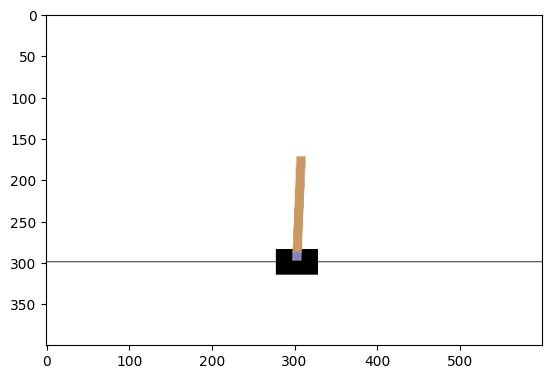

In [68]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import gymnasium as gym

# if you see "<classname> has no attribute .env", remove .env or update gym
env = gym.make("CartPole-v0", render_mode="rgb_array").env # так создается симулятов окружения

env.reset() # сбрасываем параметры симулятора (устанавливаем прошедшее всемя с начала эпизода на 0, накопленную награду на 0, сбрасываются параметры инерции)
n_actions = env.action_space.n # получаем количество возможных действий управления
state_dim = env.observation_space.shape[0] # получаем размерность вектора наблюдений
print('Выход функции step:', env.step(0)) #для того чтобы сделать шаг симуляции есть функция step, принимающая на вход действие и возвращающая следующее состояние, награду, индикатор окончания эпизода и дополнительную иннформацию
plt.imshow(env.render()) #render отрисовывает окружающую среду в формате пригодном для подачи в функцию imshow
print("state vector dim =", state_dim)
print("n_actions =", n_actions)

env.close() #останавливаем симуляцию

In [69]:
import os
from itertools import count
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical

In [70]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

Напомним суть метода A2C:

Есть 2 нейронный сети: Actor и Critic. Critic - по-сути функция Беллмана, которую обучают под дискретное уравнение Беллмана.

Actor - политика, которую мы обучает максимизировать функцию Беллмана.



In [71]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

Создайте 2 вышеупомянутые нейросети. Для нашей задачи хватит 2-3 линейных слоя в каждой. Так как пространство действий дискретно, вам  надо будет пробросить градиент через семплирование с вероятностями. В этом вам поможет torch.distributions.Categorical как возвращаемое значение Actor

In [75]:
class Actor(nn.Module):
    def __init__(self, state_size, action_size):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_size, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, action_size)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=-1)
        return x


class Critic(nn.Module):
    def __init__(self, state_size, action_size):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(state_size, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 1)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


Теперь для удобства реализуем функцию compute_returns, вычисляющую значения Q - функции. На вход она получает список rewards наград, получаемых на каждом шаге куска траектории, next_state - выход критика в последнем состоянии таектории. При обучении мы будем последовательно генерировать кусок траектории фиксированной длины (из соображений удобства). На выходе вы должны получить оценку Q-функции. Нам никто не гарантирует что эпизод не закончится раньше чем закончится генерция траектории. Например, N = 20, а на 10 эпизоде у нас маятник уже упал. gymnasium в таком случае автоматически запускает новый эпизод и при следующем вызове step эпизод будет уже новый. Для этого, в функцию передается параметр dones, являющийся списком длины N, содержащий индикаторы того, завершился ли эпизод на соответствующем шаге. Соответственно, для оценок Q-функции на куске уже траектории, известной до последнего эпизода, прибавлять V-функцию не нужно, так как мы и так знаем все награды до самого конца.

Реализуйте функцию compute_returns.

In [76]:
def compute_Q(next_value, rewards, dones, gamma=0.99):
    Q_values = []
    Q_value = next_value
    for reward, done in zip(reversed(rewards), reversed(dones)):
        Q_value = reward + gamma * Q_value * (1 - done)
        Q_values.insert(0, Q_value)
    return Q_values


Теперь реализуйте итерацию обучения. Напомним формулы:


$L_{actor} = -\frac{1}{MN} \sum_{m=0}^M \sum_{t=0}^N log(π(a_t^m|s_t^m))A(a_t^m, s_t^m)$

$L_{critic} = \frac{1}{MN} \sum_{m=0}^M \sum_{t=0}^N (V(s_t^m) - y(s_t^m, a_t^m))^2$

$y(s_t^m, a_t^m) = \sum_{t'=t}^{N-1} γ^{t'-t} r(s_{t'}, a_{t'}) + γ^{N-t} V(s_N) $

In [77]:
def trainIters(actor, critic, n_iters):
    #создайте оптимизаторы для Actor и Critic
    optimizerActor = optim.Adam(actor.parameters(), lr=1e-4)
    optimizerCritic = optim.Adam(critic.parameters(), lr=1e-4)
    actor.train()
    critic.train()
    for iter in range(n_iters):
        #обнулите окружение и получите первое состояние
        state = env.reset()
        state = state[0]
        next_state = state
        # переменные для накопления всего накапливаемого
        log_probs = torch.zeros(1000)
        values = torch.zeros(1000)
        rewards = torch.zeros(1000)
        dones = torch.ones(1000)

        #цикл по шагам в эпизоде
        for i in range(1000):
            env.render()

            #получите действие и значение V - функции в текущем состоянии state
            state = torch.tensor(next_state, dtype=torch.float32, device=device)
            ac = actor(state)
            action_probs = torch.distributions.Categorical(ac)
            action = action_probs.sample()
            log_prob = action_probs.log_prob(action)
            value = critic(state)

            #шаг симулятора
            next_state, reward, done, truncated, _ = env.step(action.item())

            #накапливаем логарифмы вероятностей, значения v-функции, действия, награды, индикаторы завершения эпизода
            log_probs[i] = log_prob
            values[i] = value
            rewards[i] = reward
            dones[i] = done

            if done:
                print('Iteration: {}, Score: {}'.format(iter, i))
                next_state, _ = env.reset()

        #получите значение V - функции в последнем состоянии (параметр next_state)
        V = critic(torch.tensor(next_state, dtype=torch.float32, device=device))

        #вычислите Q-функции
        Q = torch.tensor(compute_Q(V, rewards, dones))

        #вычислите advantage
        advantage = Q - values.detach(), Q - values

        #вычислите actor_loss
        actor_loss = -torch.mean(log_probs * advantage[0])

        #вычислите critic_loss
        critic_loss = torch.mean(advantage[1].pow(2))

        #сделайте шаг оптимизации critic_loss
        optimizerCritic.zero_grad()
        critic_loss.backward()
        optimizerCritic.step()
        optimizerActor.zero_grad()
        actor_loss.backward()
        optimizerActor.step()

    torch.save(actor, 'actor.pkl')
    torch.save(critic, 'critic.pkl')
    env.close()

actor = Actor(state_size, action_size).to(device)
critic = Critic(state_size, action_size).to(device)
trainIters(actor, critic, n_iters=500)

Iteration: 0, Score: 10
Iteration: 0, Score: 38
Iteration: 0, Score: 66
Iteration: 0, Score: 83
Iteration: 0, Score: 109
Iteration: 0, Score: 121
Iteration: 0, Score: 147
Iteration: 0, Score: 160
Iteration: 0, Score: 173
Iteration: 0, Score: 187
Iteration: 0, Score: 203
Iteration: 0, Score: 248
Iteration: 0, Score: 260
Iteration: 0, Score: 280
Iteration: 0, Score: 297
Iteration: 0, Score: 313
Iteration: 0, Score: 333
Iteration: 0, Score: 352
Iteration: 0, Score: 373
Iteration: 0, Score: 406
Iteration: 0, Score: 434
Iteration: 0, Score: 446
Iteration: 0, Score: 462
Iteration: 0, Score: 528
Iteration: 0, Score: 544
Iteration: 0, Score: 570
Iteration: 0, Score: 617
Iteration: 0, Score: 639
Iteration: 0, Score: 654
Iteration: 0, Score: 689
Iteration: 0, Score: 710
Iteration: 0, Score: 786
Iteration: 0, Score: 831
Iteration: 0, Score: 853
Iteration: 0, Score: 864
Iteration: 0, Score: 876
Iteration: 0, Score: 902
Iteration: 0, Score: 918
Iteration: 0, Score: 930
Iteration: 0, Score: 945
Iter

Iteration: 5, Score: 754
Iteration: 5, Score: 773
Iteration: 5, Score: 784
Iteration: 5, Score: 804
Iteration: 5, Score: 814
Iteration: 5, Score: 837
Iteration: 5, Score: 858
Iteration: 5, Score: 879
Iteration: 5, Score: 898
Iteration: 5, Score: 916
Iteration: 5, Score: 944
Iteration: 5, Score: 973
Iteration: 5, Score: 986
Iteration: 6, Score: 11
Iteration: 6, Score: 29
Iteration: 6, Score: 66
Iteration: 6, Score: 118
Iteration: 6, Score: 137
Iteration: 6, Score: 160
Iteration: 6, Score: 186
Iteration: 6, Score: 196
Iteration: 6, Score: 212
Iteration: 6, Score: 228
Iteration: 6, Score: 252
Iteration: 6, Score: 270
Iteration: 6, Score: 308
Iteration: 6, Score: 383
Iteration: 6, Score: 404
Iteration: 6, Score: 423
Iteration: 6, Score: 433
Iteration: 6, Score: 463
Iteration: 6, Score: 475
Iteration: 6, Score: 522
Iteration: 6, Score: 548
Iteration: 6, Score: 585
Iteration: 6, Score: 600
Iteration: 6, Score: 618
Iteration: 6, Score: 633
Iteration: 6, Score: 675
Iteration: 6, Score: 694
Ite

Проверьте обученные сети. Награда после завершения эпизода должна быть стабильно больше 300. Можно менять количество эпох обучения

In [79]:
#для тестирования скопируйте цикл for из предыдущей ячейки сюда, удалите логгирования, замените range(N) на count() (тогда он будет бесконечно итерироваться) и в if done запихните break.
#Прогонить эпизод несколько раз
actor.eval()
critic.eval()
for iter in range(10):
        #обнулите окружение и получите первое состояние
        state = env.reset()
        state = state[0]
        next_state = state
        summ = 0

        #цикл по шагам в эпизоде
        for i in count():
            env.render()

            #получите действие и значение V - функции в текущем состоянии state
            state = torch.tensor(next_state, dtype=torch.float32, device=device)
            ac = actor(state)
            action_probs = torch.distributions.Categorical(ac)
            action = action_probs.sample()

            #шаг симулятора
            next_state, reward, done, truncated, _ = env.step(action.item())
            summ += reward

            if done:
                print('Iteration: {}, Reward: {}'.format(iter, summ))
                break

Iteration: 0, Reward: 550.0
Iteration: 1, Reward: 417.0
Iteration: 2, Reward: 763.0
Iteration: 3, Reward: 626.0
Iteration: 4, Reward: 326.0
Iteration: 5, Reward: 2048.0
Iteration: 6, Reward: 393.0
Iteration: 7, Reward: 926.0
Iteration: 8, Reward: 729.0
Iteration: 9, Reward: 321.0


Реализуем функцию для записи траекторий.

In [80]:
def generate_session(env, agent, t_max=1000):
    """
    Play a single game using agent neural network.
    Terminate when game finishes or after :t_max: steps
    """
    states, actions = [], []
    total_reward = 0

    s = env.reset()[0]

    for t in range(t_max):
        state = torch.tensor(s, dtype=torch.float32).unsqueeze(0).to(device)

        a = torch.distributions.Categorical(agent(torch.tensor(s, dtype=torch.float32).unsqueeze(0).to(device))).sample().item()

        new_s, r, terminated, truncated, _ = env.step(a)

        # накаливаем траекторию
        states.append(s)
        actions.append(a)
        total_reward += r

        s = new_s
        if terminated or truncated:
            break
    return states, actions, total_reward

Запишем видео работы сетей (парочку видео приложите в  энитаск)

In [81]:
from gymnasium.wrappers import RecordVideo

with RecordVideo(
    env=gym.make("CartPole-v0", render_mode="rgb_array"),
    video_folder="./videos",
    episode_trigger=lambda episode_number: True,
) as env_monitor:
    sessions = [generate_session(env_monitor, actor) for _ in range(100)]

/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-0.mp4
Moviepy - Building video /content/videos/rl-video-episode-1.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-1.mp4
Moviepy - Building video /content/videos/rl-video-episode-2.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-2.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-2.mp4
Moviepy - Building video /content/videos/rl-video-episode-3.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-3.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-3.mp4
Moviepy - Building video /content/videos/rl-video-episode-4.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-4.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-4.mp4
Moviepy - Building video /content/videos/rl-video-episode-5.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-5.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-5.mp4
Moviepy - Building video /content/videos/rl-video-episode-6.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-6.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-6.mp4
Moviepy - Building video /content/videos/rl-video-episode-7.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-7.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-7.mp4
Moviepy - Building video /content/videos/rl-video-episode-8.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-8.mp4
Moviepy - Building video /content/videos/rl-video-episode-9.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-9.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-9.mp4
Moviepy - Building video /content/videos/rl-video-episode-10.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-10.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-10.mp4
Moviepy - Building video /content/videos/rl-video-episode-11.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-11.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-11.mp4
Moviepy - Building video /content/videos/rl-video-episode-12.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-12.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-12.mp4
Moviepy - Building video /content/videos/rl-video-episode-13.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-13.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-13.mp4
Moviepy - Building video /content/videos/rl-video-episode-14.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-14.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-14.mp4
Moviepy - Building video /content/videos/rl-video-episode-15.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-15.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-15.mp4
Moviepy - Building video /content/videos/rl-video-episode-16.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-16.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-16.mp4
Moviepy - Building video /content/videos/rl-video-episode-17.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-17.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-17.mp4
Moviepy - Building video /content/videos/rl-video-episode-18.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-18.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-18.mp4
Moviepy - Building video /content/videos/rl-video-episode-19.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-19.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-19.mp4
Moviepy - Building video /content/videos/rl-video-episode-20.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-20.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-20.mp4
Moviepy - Building video /content/videos/rl-video-episode-21.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-21.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-21.mp4
Moviepy - Building video /content/videos/rl-video-episode-22.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-22.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-22.mp4
Moviepy - Building video /content/videos/rl-video-episode-23.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-23.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-23.mp4
Moviepy - Building video /content/videos/rl-video-episode-24.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-24.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-24.mp4
Moviepy - Building video /content/videos/rl-video-episode-25.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-25.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-25.mp4
Moviepy - Building video /content/videos/rl-video-episode-26.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-26.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-26.mp4
Moviepy - Building video /content/videos/rl-video-episode-27.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-27.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-27.mp4
Moviepy - Building video /content/videos/rl-video-episode-28.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-28.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-28.mp4
Moviepy - Building video /content/videos/rl-video-episode-29.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-29.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-29.mp4
Moviepy - Building video /content/videos/rl-video-episode-30.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-30.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-30.mp4
Moviepy - Building video /content/videos/rl-video-episode-31.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-31.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-31.mp4
Moviepy - Building video /content/videos/rl-video-episode-32.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-32.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-32.mp4
Moviepy - Building video /content/videos/rl-video-episode-33.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-33.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-33.mp4
Moviepy - Building video /content/videos/rl-video-episode-34.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-34.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-34.mp4
Moviepy - Building video /content/videos/rl-video-episode-35.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-35.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-35.mp4
Moviepy - Building video /content/videos/rl-video-episode-36.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-36.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-36.mp4
Moviepy - Building video /content/videos/rl-video-episode-37.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-37.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-37.mp4
Moviepy - Building video /content/videos/rl-video-episode-38.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-38.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-38.mp4
Moviepy - Building video /content/videos/rl-video-episode-39.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-39.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-39.mp4
Moviepy - Building video /content/videos/rl-video-episode-40.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-40.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-40.mp4
Moviepy - Building video /content/videos/rl-video-episode-41.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-41.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-41.mp4
Moviepy - Building video /content/videos/rl-video-episode-42.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-42.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-42.mp4
Moviepy - Building video /content/videos/rl-video-episode-43.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-43.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-43.mp4
Moviepy - Building video /content/videos/rl-video-episode-44.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-44.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-44.mp4
Moviepy - Building video /content/videos/rl-video-episode-45.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-45.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-45.mp4
Moviepy - Building video /content/videos/rl-video-episode-46.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-46.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-46.mp4
Moviepy - Building video /content/videos/rl-video-episode-47.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-47.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-47.mp4
Moviepy - Building video /content/videos/rl-video-episode-48.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-48.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-48.mp4
Moviepy - Building video /content/videos/rl-video-episode-49.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-49.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-49.mp4
Moviepy - Building video /content/videos/rl-video-episode-50.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-50.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-50.mp4
Moviepy - Building video /content/videos/rl-video-episode-51.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-51.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-51.mp4
Moviepy - Building video /content/videos/rl-video-episode-52.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-52.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-52.mp4
Moviepy - Building video /content/videos/rl-video-episode-53.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-53.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-53.mp4
Moviepy - Building video /content/videos/rl-video-episode-54.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-54.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-54.mp4
Moviepy - Building video /content/videos/rl-video-episode-55.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-55.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-55.mp4
Moviepy - Building video /content/videos/rl-video-episode-56.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-56.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-56.mp4
Moviepy - Building video /content/videos/rl-video-episode-57.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-57.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-57.mp4
Moviepy - Building video /content/videos/rl-video-episode-58.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-58.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-58.mp4
Moviepy - Building video /content/videos/rl-video-episode-59.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-59.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-59.mp4
Moviepy - Building video /content/videos/rl-video-episode-60.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-60.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-60.mp4
Moviepy - Building video /content/videos/rl-video-episode-61.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-61.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-61.mp4
Moviepy - Building video /content/videos/rl-video-episode-62.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-62.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-62.mp4
Moviepy - Building video /content/videos/rl-video-episode-63.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-63.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-63.mp4
Moviepy - Building video /content/videos/rl-video-episode-64.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-64.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-64.mp4
Moviepy - Building video /content/videos/rl-video-episode-65.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-65.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-65.mp4
Moviepy - Building video /content/videos/rl-video-episode-66.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-66.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-66.mp4
Moviepy - Building video /content/videos/rl-video-episode-67.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-67.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-67.mp4
Moviepy - Building video /content/videos/rl-video-episode-68.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-68.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-68.mp4
Moviepy - Building video /content/videos/rl-video-episode-69.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-69.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-69.mp4
Moviepy - Building video /content/videos/rl-video-episode-70.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-70.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-70.mp4
Moviepy - Building video /content/videos/rl-video-episode-71.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-71.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-71.mp4
Moviepy - Building video /content/videos/rl-video-episode-72.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-72.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-72.mp4
Moviepy - Building video /content/videos/rl-video-episode-73.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-73.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-73.mp4
Moviepy - Building video /content/videos/rl-video-episode-74.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-74.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-74.mp4
Moviepy - Building video /content/videos/rl-video-episode-75.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-75.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-75.mp4
Moviepy - Building video /content/videos/rl-video-episode-76.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-76.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-76.mp4
Moviepy - Building video /content/videos/rl-video-episode-77.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-77.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-77.mp4
Moviepy - Building video /content/videos/rl-video-episode-78.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-78.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-78.mp4
Moviepy - Building video /content/videos/rl-video-episode-79.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-79.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-79.mp4
Moviepy - Building video /content/videos/rl-video-episode-80.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-80.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-80.mp4
Moviepy - Building video /content/videos/rl-video-episode-81.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-81.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-81.mp4
Moviepy - Building video /content/videos/rl-video-episode-82.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-82.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-82.mp4
Moviepy - Building video /content/videos/rl-video-episode-83.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-83.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-83.mp4
Moviepy - Building video /content/videos/rl-video-episode-84.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-84.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-84.mp4
Moviepy - Building video /content/videos/rl-video-episode-85.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-85.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-85.mp4
Moviepy - Building video /content/videos/rl-video-episode-86.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-86.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-86.mp4
Moviepy - Building video /content/videos/rl-video-episode-87.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-87.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-87.mp4
Moviepy - Building video /content/videos/rl-video-episode-88.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-88.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-88.mp4
Moviepy - Building video /content/videos/rl-video-episode-89.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-89.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-89.mp4
Moviepy - Building video /content/videos/rl-video-episode-90.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-90.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-90.mp4
Moviepy - Building video /content/videos/rl-video-episode-91.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-91.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-91.mp4
Moviepy - Building video /content/videos/rl-video-episode-92.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-92.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-92.mp4
Moviepy - Building video /content/videos/rl-video-episode-93.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-93.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-93.mp4
Moviepy - Building video /content/videos/rl-video-episode-94.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-94.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-94.mp4
Moviepy - Building video /content/videos/rl-video-episode-95.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-95.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-95.mp4
Moviepy - Building video /content/videos/rl-video-episode-96.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-96.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-96.mp4
Moviepy - Building video /content/videos/rl-video-episode-97.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-97.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-97.mp4
Moviepy - Building video /content/videos/rl-video-episode-98.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-98.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-98.mp4
Moviepy - Building video /content/videos/rl-video-episode-99.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-99.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-99.mp4


In [82]:
from google.colab import files

# Замените путь на тот, где находится ваше видео
files.download('/content/videos/rl-video-episode-1.mp4')
files.download('/content/videos/rl-video-episode-10.mp4')
files.download('/content/videos/rl-video-episode-20.mp4')
files.download('/content/videos/rl-video-episode-30.mp4')
files.download('/content/videos/rl-video-episode-55.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>